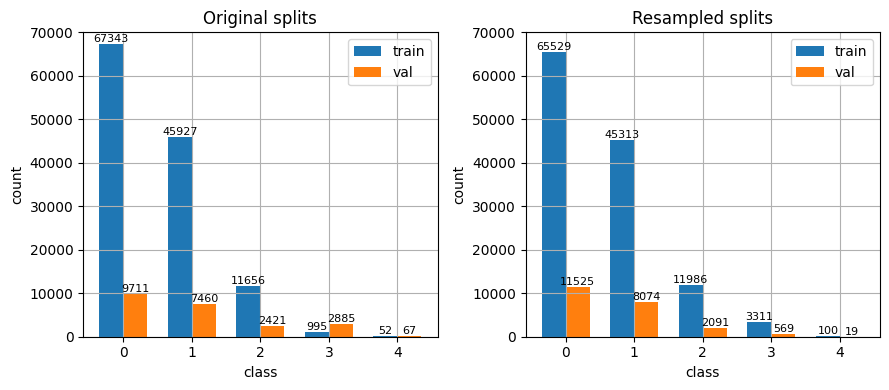

0.1442
0.1624
0.2077
2.8995
1.2885

statistics
0.0660 0.2401 0.0000 1.000000
0.0674 0.2425 0.0000 1.000000

0.1759
0.1782
0.1745
0.1719
0.19

statistics
0.0662 0.2404 0.0000 1.000000
0.0663 0.2406 0.0000 1.000000


In [3]:
from joblib import load
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

dsdir = 'datasets/'
Dnormal_train = load(dsdir + "normal_train_preprocess.joblib")
Dattacks_train = load(dsdir + "Attacks_train_preprocess.joblib")
Dnormal_test = load(dsdir + "normal_test_preprocess.joblib")
Dattacks_test = load(dsdir + "Attacks_test_preprocess.joblib")
Dtrain = np.concatenate([Dnormal_train,Dattacks_train])
Dtest = np.concatenate([Dnormal_test,Dattacks_test])

dsname = "normal_attacks_original"
Xt, Yt = shuffle(Dtrain[:, 0:122], Dtrain[:,122], random_state=0)
Xtest, Ytest = Dtest[:, 0:122], Dtest[:,122]

dsname = "normal_attacks_resampled"
data = np.load("datasets/dataset_2.npz")
Xt2, Yt2 = shuffle(data["X_train"], data["Y_train"], random_state=0)
Xtest2 = data["X_test"]
Ytest2 = data["Y_test"]

def eda(Xt, Yt, Xtest, Ytest, name):
    bins = np.arange(-0.5, 5.5, 1)
    yt_counts, _ = np.histogram(Yt, bins=bins)
    ytest_counts, _ = np.histogram(Ytest, bins=bins)
    width = 0.35
    x = np.arange(len(yt_counts))
    bars1 = plt.bar(x - width/2, yt_counts, width=width, label='train', align='center')
    bars2 = plt.bar(x + width/2, ytest_counts, width=width, label='val', align='center')
    plt.xticks(x, [str(int(i)) for i in x])
    plt.legend()
    plt.grid(True)
    plt.xlabel('class')
    plt.ylabel('count')
    plt.title(name)
    plt.ylim(0, 70000)
    # Añadir la cuenta encima de cada barra
    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8)
    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(f"figures/original_hist.svg", dpi=300, bbox_inches='tight')


def stats(Xt, Yt, Xtest, Ytest):
    for i in range(5):
        strain, stest = (Yt == i).sum(), (Ytest == i).sum()
        p = round(stest/strain, 4)
        print(p)

    print()
    print('statistics')
    print('{:.4f} {:.4f} {:.4f} {:4f}'.format(Xt.mean(), Xt.std(), Xt.min(), Xt.max()))
    print('{:.4f} {:.4f} {:.4f} {:4f}'.format(Xtest.mean(), Xtest.std(), Xtest.min(), Xtest.max()))

plt.figure(figsize=(9,4))
plt.subplot(121)
eda(Xt, Yt, Xtest, Ytest, 'Original splits')
plt.subplot(122)
eda(Xt2, Yt2, Xtest2, Ytest2, 'Resampled splits')
plt.show() 

stats(Xt, Yt, Xtest, Ytest)
print()
stats(Xt2, Yt2, Xtest2, Ytest2)